In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
train = pd.read_csv("C:/Users/vishw/PycharmProjects/kaggle/Predicting Red Hat Business Value/act_train.csv", parse_dates=['date'])
test = pd.read_csv("C:/Users/vishw/PycharmProjects/kaggle/Predicting Red Hat Business Value/act_test.csv", parse_dates=['date'])
ppl = pd.read_csv("C:/Users/vishw/PycharmProjects/kaggle/Predicting Red Hat Business Value/people.csv", parse_dates=['date'])

In [4]:
df_train = pd.merge(train, ppl, on='people_id')
df_test = pd.merge(test, ppl, on='people_id')
del train, test, ppl

In [5]:
for d in ['date_x', 'date_y']:
    print('Start of ' + d + ': ' + str(df_train[d].min().date()))
    print('  End of ' + d + ': ' + str(df_train[d].max().date()))
    print('Range of ' + d + ': ' + str(df_train[d].max() - df_train[d].min()) + '\n')

Start of date_x: 2022-07-17
  End of date_x: 2023-08-31
Range of date_x: 410 days 00:00:00

Start of date_y: 2020-05-18
  End of date_y: 2023-08-31
Range of date_y: 1200 days 00:00:00



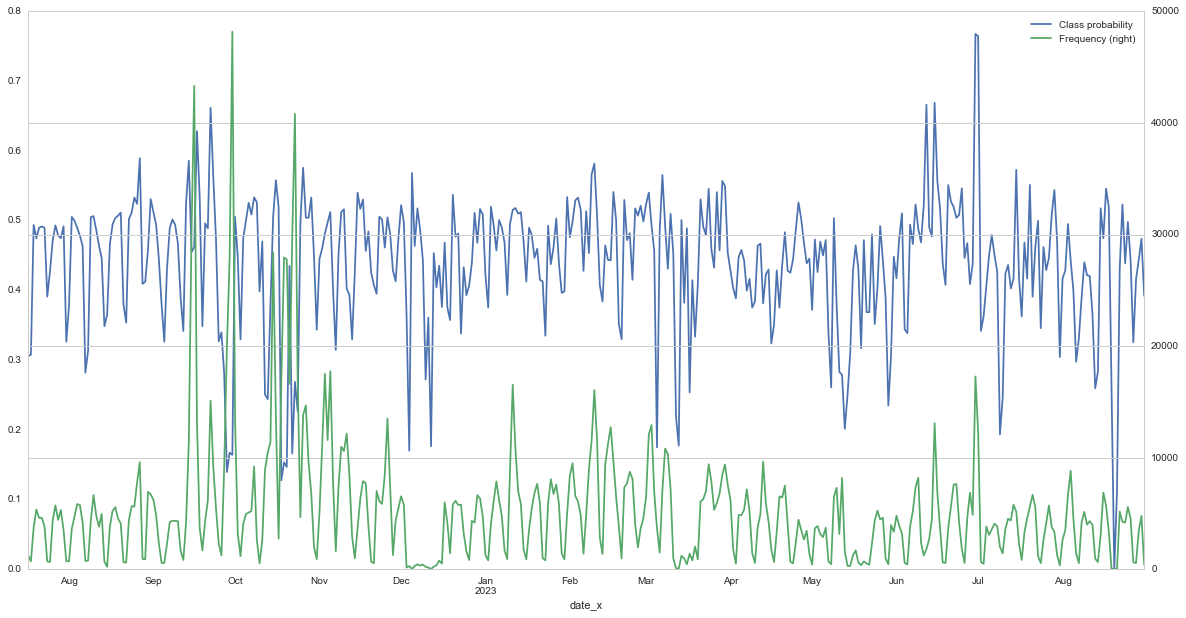

In [6]:
date_x = pd.DataFrame()
date_x['Class probability'] = df_train.groupby('date_x')['outcome'].mean()
date_x['Frequency'] = df_train.groupby('date_x')['outcome'].size()
date_x.plot(secondary_y='Frequency', figsize=(20, 10))

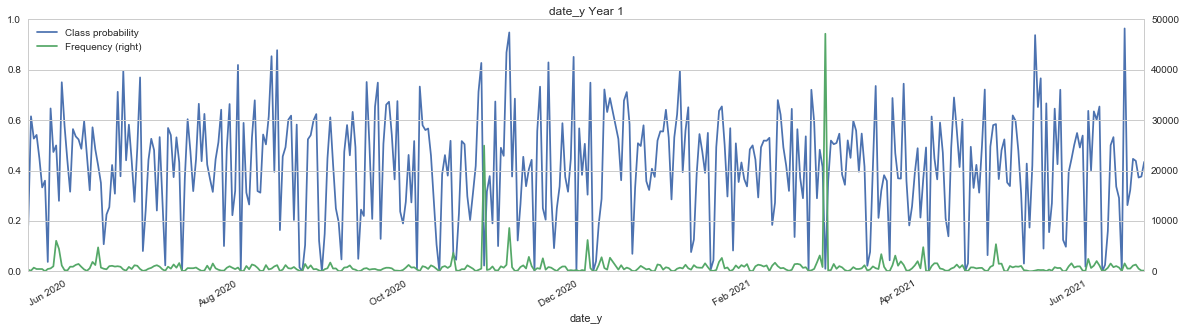

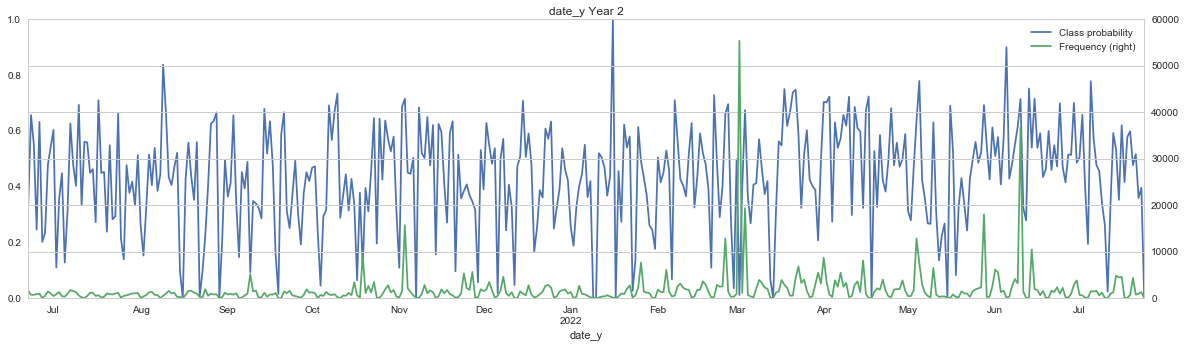

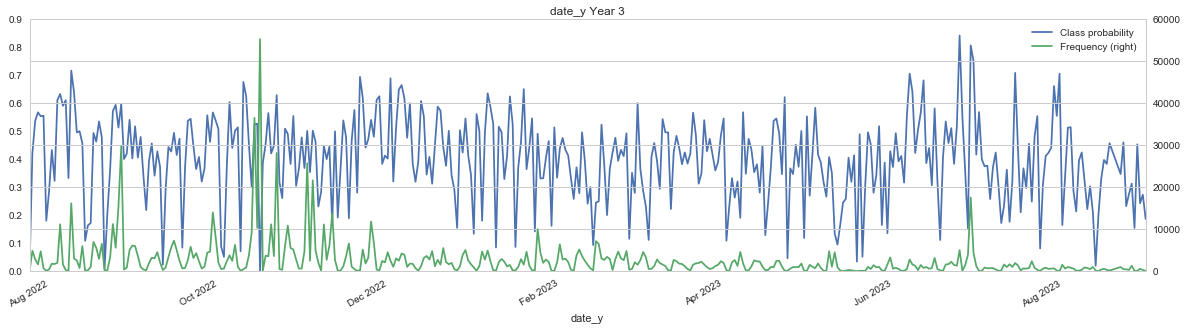

In [7]:
date_y = pd.DataFrame()
date_y['Class probability'] = df_train.groupby('date_y')['outcome'].mean()
date_y['Frequency'] = df_train.groupby('date_y')['outcome'].size()
# We need to split it into multiple graphs since the time-scale is too long to show well on one graph
i = int(len(date_y) / 3)
date_y[:i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 1')
date_y[i:2*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2')
date_y[2*i:].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 3')

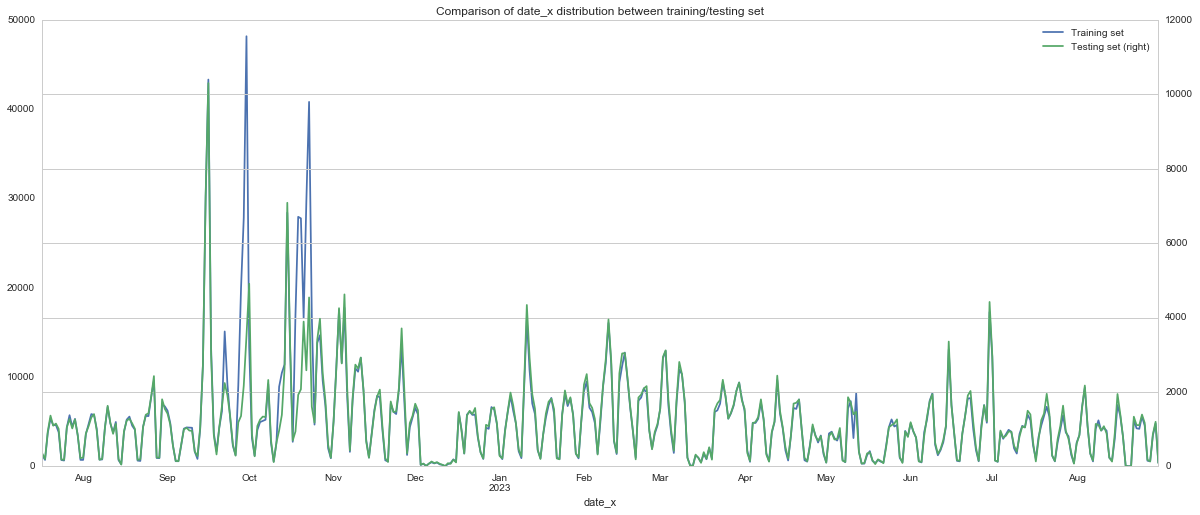

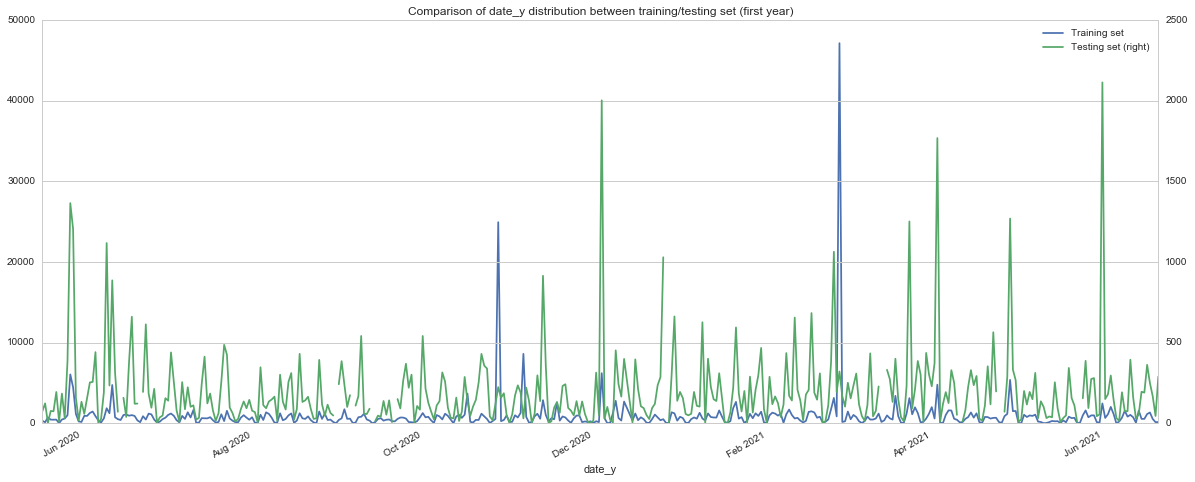

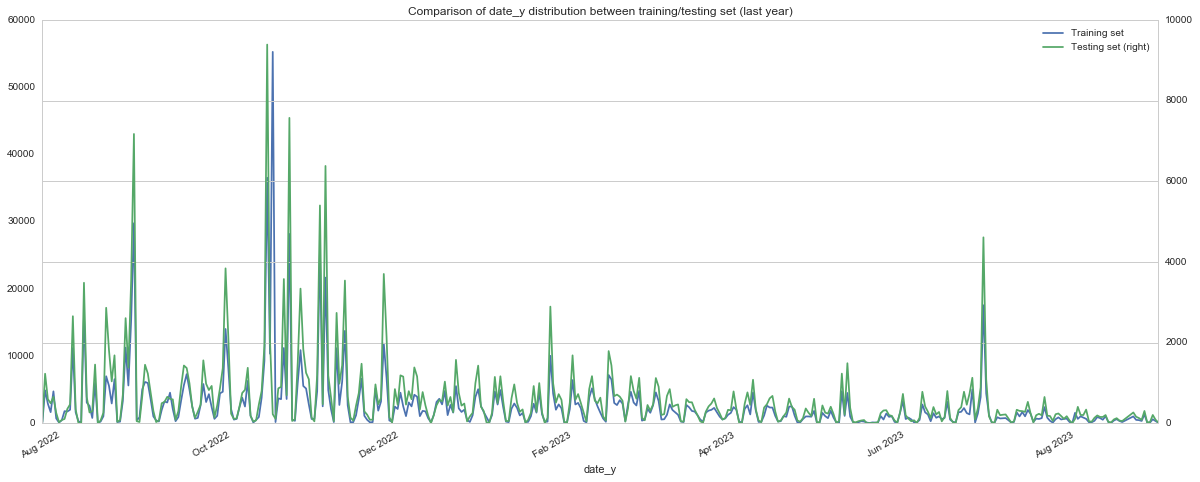

In [8]:
date_x_freq = pd.DataFrame()
date_x_freq['Training set'] = df_train.groupby('date_x')['activity_id'].count()
date_x_freq['Testing set'] = df_test.groupby('date_x')['activity_id'].count()
date_x_freq.plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_x distribution between training/testing set')
date_y_freq = pd.DataFrame()
date_y_freq['Training set'] = df_train.groupby('date_y')['activity_id'].count()
date_y_freq['Testing set'] = df_test.groupby('date_y')['activity_id'].count()
date_y_freq[:i].plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_y distribution between training/testing set (first year)')
date_y_freq[2*i:].plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_y distribution between training/testing set (last year)')

In [9]:
print('Correlation of date_x distribution in training/testing sets: ' + str(np.corrcoef(date_x_freq.T)[0,1]))
print('Correlation of date_y distribution in training/testing sets: ' + str(np.corrcoef(date_y_freq.fillna(0).T)[0,1]))

Correlation of date_x distribution in training/testing sets: 0.853430807691
Correlation of date_y distribution in training/testing sets: 0.709589035055


In [10]:
print('date_y correlation in year 1: ' + str(np.corrcoef(date_y_freq[:i].fillna(0).T)[0,1]))
print('date_y correlation in year 2: ' + str(np.corrcoef(date_y_freq[i:2*i].fillna(0).T)[0,1]))
print('date_y correlation in year 3: ' + str(np.corrcoef(date_y_freq[2*i:].fillna(0).T)[0,1]))

date_y correlation in year 1: 0.237056344324
date_y correlation in year 2: 0.682344221229
date_y correlation in year 3: 0.807207224857


In [11]:
from sklearn.metrics import roc_auc_score
features = pd.DataFrame()
features['date_x_prob'] = df_train.groupby('date_x')['outcome'].transform('mean')
features['date_y_prob'] = df_train.groupby('date_y')['outcome'].transform('mean')
features['date_x_count'] = df_train.groupby('date_x')['outcome'].transform('count')
features['date_y_count'] = df_train.groupby('date_y')['outcome'].transform('count')
_=[print(f.ljust(12) + ' AUC: ' + str(round(roc_auc_score(df_train['outcome'], features[f]), 6))) for f in features.columns]

date_x_prob  AUC: 0.626182
date_y_prob  AUC: 0.720296
date_x_count AUC: 0.465697
date_y_count AUC: 0.475916


In [12]:
df_train.head(5)

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [17]:
df_test.head(10)

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,...,True,True,True,True,True,True,True,True,True,76
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,76
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,...,False,True,True,True,True,True,True,True,True,90
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,...,False,True,True,True,True,True,True,True,True,90
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,90
5,ppl_10001,act2_112890,2022-11-27,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,90
6,ppl_10001,act2_1169930,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,90
7,ppl_10001,act2_1924448,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,90
8,ppl_10001,act2_1953554,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,90
9,ppl_10001,act2_1971739,2022-11-28,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,90


In [18]:
df_train = df_train.drop(['char_1_x', 'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x'], axis=1)
df_test = df_test.drop(['char_1_x', 'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x'], axis=1)

In [19]:
categorical_variables = df_train.dtypes.loc[df_train.dtypes == 'object'].index
print(categorical_variables)

Index(['people_id', 'activity_id', 'activity_category', 'char_10_x',
       'char_1_y', 'group_1', 'char_2_y', 'char_3_y', 'char_4_y', 'char_5_y',
       'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y'],
      dtype='object')


In [20]:
df_train[categorical_variables].apply(lambda x: len(x.unique()))

people_id             151295
activity_id          2197291
activity_category          7
char_10_x               6516
char_1_y                   2
group_1                29899
char_2_y                   3
char_3_y                  43
char_4_y                  25
char_5_y                   9
char_6_y                   7
char_7_y                  25
char_8_y                   8
char_9_y                   9
dtype: int64

In [23]:
df_train.head(20)

,people_id,activity_id,date_x,activity_category,char_10_x,outcome,char_1_y,group_1,char_2_y,date_y,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
5,ppl_100,act2_898576,2023-08-04,type 4,type 1727,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
6,ppl_100002,act2_1233489,2022-11-23,type 2,type 1,1,type 2,group 8688,type 3,2021-01-06,...,False,True,True,True,True,True,True,True,False,76
7,ppl_100002,act2_1623405,2022-11-23,type 2,type 1,1,type 2,group 8688,type 3,2021-01-06,...,False,True,True,True,True,True,True,True,False,76
8,ppl_100003,act2_1111598,2023-02-07,type 2,type 1,1,type 2,group 33592,type 3,2022-06-10,...,False,False,True,True,True,True,False,True,True,99
9,ppl_100003,act2_1177453,2023-06-28,type 2,type 1,1,type 2,group 33592,type 3,2022-06-10,...,False,False,True,True,True,True,False,True,True,99


In [24]:
categorical_variables = df_train.dtypes.loc[df_train.dtypes == 'object'].index
print(categorical_variables)

Index(['people_id', 'activity_id', 'activity_category', 'char_10_x',
       'char_1_y', 'group_1', 'char_2_y', 'char_3_y', 'char_4_y', 'char_5_y',
       'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y'],
      dtype='object')


In [25]:
df_train = df_train.drop(['people_id'], axis=1)
df_test = df_test.drop(['people_id'], axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df_train['activity_category'] = number.fit_transform(df_train['activity_category'].astype('str'))
df_train['char_10_x'] = number.fit_transform(df_train['char_10_x'].astype('str'))
df_train['char_1_y'] = number.fit_transform(df_train['char_1_y'].astype('str'))
df_train['group_1'] = number.fit_transform(df_train['group_1'].astype('str'))
df_train['char_2_y'] = number.fit_transform(df_train['char_2_y'].astype('str'))
df_train['char_8_y'] = number.fit_transform(df_train['char_8_y'].astype('str'))
df_train['char_9_y'] = number.fit_transform(df_train['char_9_y'].astype('str'))
df_train['char_3_y'] = number.fit_transform(df_train['char_3_y'].astype('str'))
df_train['char_4_y'] = number.fit_transform(df_train['char_4_y'].astype('str'))
df_train['char_5_y'] = number.fit_transform(df_train['char_5_y'].astype('str'))
df_train['char_6_y'] = number.fit_transform(df_train['char_6_y'].astype('str'))
df_train['char_7_y'] = number.fit_transform(df_train['char_7_y'].astype('str'))

In [29]:
number = LabelEncoder()
df_test['activity_category'] = number.fit_transform(df_test['activity_category'].astype('str'))
df_test['char_10_x'] = number.fit_transform(df_test['char_10_x'].astype('str'))
df_test['char_1_y'] = number.fit_transform(df_test['char_1_y'].astype('str'))
df_test['group_1'] = number.fit_transform(df_test['group_1'].astype('str'))
df_test['char_2_y'] = number.fit_transform(df_test['char_2_y'].astype('str'))
df_test['char_8_y'] = number.fit_transform(df_test['char_8_y'].astype('str'))
df_test['char_9_y'] = number.fit_transform(df_test['char_9_y'].astype('str'))
df_test['char_3_y'] = number.fit_transform(df_test['char_3_y'].astype('str'))
df_test['char_4_y'] = number.fit_transform(df_test['char_4_y'].astype('str'))
df_test['char_5_y'] = number.fit_transform(df_test['char_5_y'].astype('str'))
df_test['char_6_y'] = number.fit_transform(df_test['char_6_y'].astype('str'))
df_test['char_7_y'] = number.fit_transform(df_test['char_7_y'].astype('str'))

In [30]:
df_train.head(20)

,activity_id,date_x,activity_category,char_10_x,outcome,char_1_y,group_1,char_2_y,date_y,char_3_y,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,act2_1734928,2023-08-26,3,4872,0,1,24002,1,2021-06-29,38,...,False,True,True,False,False,True,True,True,False,36
1,act2_2434093,2022-09-27,1,1,0,1,24002,1,2021-06-29,38,...,False,True,True,False,False,True,True,True,False,36
2,act2_3404049,2022-09-27,1,1,0,1,24002,1,2021-06-29,38,...,False,True,True,False,False,True,True,True,False,36
3,act2_3651215,2023-08-04,1,1,0,1,24002,1,2021-06-29,38,...,False,True,True,False,False,True,True,True,False,36
4,act2_4109017,2023-08-26,1,1,0,1,24002,1,2021-06-29,38,...,False,True,True,False,False,True,True,True,False,36
5,act2_898576,2023-08-04,3,6254,0,1,24002,1,2021-06-29,38,...,False,True,True,False,False,True,True,True,False,36
6,act2_1233489,2022-11-23,1,1,1,1,21089,2,2021-01-06,20,...,False,True,True,True,True,True,True,True,False,76
7,act2_1623405,2022-11-23,1,1,1,1,21089,2,2021-01-06,20,...,False,True,True,True,True,True,True,True,False,76
8,act2_1111598,2023-02-07,1,1,1,1,6627,2,2022-06-10,33,...,False,False,True,True,True,True,False,True,True,99
9,act2_1177453,2023-06-28,1,1,1,1,6627,2,2022-06-10,33,...,False,False,True,True,True,True,False,True,True,99
